Esquema inicial

![Alt text](Road%20Map%20EDA.jpg)

# Libreria

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Consumption


In [3]:
# Muestreo 1

df = pd.read_excel(r'C:\Users\34680\Desktop\Eda-Infration_GDP\src\data\Consumption global.xls')



In [4]:
# df_1 Consumption Global
df_1 = df
df_1.set_index('Data Source', inplace = True)
df_1= df_1.reset_index()
df_1.head()

,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,Last Updated Date,2023-05-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1.980000e+03,1.981000e+03,1.982000e+03,1.983000e+03,1.984000e+03,1.985000e+03,1.986000e+03,1.987000e+03,1.988000e+03,1.989000e+03,1.990000e+03,1.991000e+03,1.992000e+03,1.993000e+03,1.994000e+03,1.995000e+03,1.996000e+03,1.997000e+03,1.998000e+03,1.999000e+03,2.000000e+03,2.001000e+03,2.002000e+03,2.003000e+03,2.004000e+03,2.005000e+03,2.006000e+03,2.007000e+03,2.008000e+03,2.009000e+03,2.010000e+03,2.011000e+03,2.012000e+03,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03,2.017000e+03,2.018000e+03,2.019000e+03,2.020000e+03,2.021000e+03,2022.0
3,Aruba,ABW,Final consumption expenditure (current US$),NE.CON.TOTL.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.301676e+08,1.015642e+09,1.125140e+09,1.203911e+09,1.271508e+09,1.326257e+09,1.410615e+09,1.520112e+09,1.603352e+09,1.683240e+09,1.787709e+09,1.910056e+09,2.091061e+09,2.159218e+09,2.096089e+09,2.127933e+09,2.308939e+09,2.272626e+09,2.317877e+09,2.322346e+09,2.328492e+09,2.327933e+09,2.416760e+09,2.537430e+09,2.617661e+09,2.353441e+09,2.485215e+09,NaN
4,Africa Eastern and Southern,AFE,Final consumption expenditure (current US$),NE.CON.TOTL.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.104673e+11,1.208300e+11,1.166312e+11,1.255144e+11,1.179152e+11,9.407384e+10,1.086603e+11,1.401125e+11,1.520721e+11,1.626945e+11,2.008628e+11,2.189308e+11,1.925350e+11,1.892095e+11,2.023450e+11,2.263033e+11,2.229207e+11,2.379261e+11,2.265053e+11,2.222035e+11,2.360269e+11,2.142620e+11,2.142240e+11,2.863704e+11,3.563102e+11,4.073689e+11,4.453639e+11,5.059647e+11,5.305440e+11,5.630155e+11,6.723081e+11,7.532912e+11,7.793224e+11,7.929590e+11,7.918409e+11,7.452465e+11,7.161344e+11,8.084458e+11,8.184649e+11,8.077255e+11,7.502285e+11,8.676975e+11,NaN


In [5]:

# Obtener la fila de cabecera y renombrar las columnas del DataFrame
cabecera = df_1.iloc[2]
df_1 = df_1.rename(columns=cabecera)
df_1.columns = df_1.columns.astype(str).str.split('.').str[0]
df_1 = df_1.rename(columns=lambda x: x.split('.')[0] if '.' in x else x)

# Eliminar filas y columnas innecesarias
df_1 = df_1.drop([0, 1, 2])
df_1 = df_1.drop(['Indicator Name', 'Indicator Code'], axis=1)

# Restablecer los índices del DataFrame resultante
df_1 = df_1.reset_index(drop=True)

# Eliminar filas con nombres de país que tienen más de 3 palabras
df_1 = df_1[df_1['Country Name'].str.split().str.len() <= 3]

# Calcular la cantidad de valores NaN por fila
df_1['NaN Count'] = df_1.isna().sum(axis=1)

# Ordenar el DataFrame por la columna 'NaN Count' en orden ascendente
df_1_sorted = df_1.sort_values('NaN Count')

In [6]:
df_1 = df_1_sorted.reset_index(drop=True)
df_1 = df_1.rename(columns={'Country Code': 'LOCATION'})

df_1.head()

,Country Name,LOCATION,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,NaN Count
0,Zimbabwe,ZWE,9.284669e+08,9.413203e+08,9.633679e+08,1.019981e+09,1.093372e+09,1.132393e+09,1.090142e+09,1.153566e+09,1.167060e+09,1.452735e+09,1.538685e+09,1.739245e+09,2.042981e+09,2.552321e+09,2.996817e+09,3.338254e+09,3.540199e+09,3.577473e+09,3.836677e+09,4.732736e+09,5.858302e+09,7.055351e+09,7.544412e+09,7.078168e+09,5.309292e+09,4.621112e+09,4.937386e+09,5.548478e+09,6.088400e+09,6.906060e+09,7.251226e+09,7.274255e+09,6.010295e+09,5.182118e+09,5.387862e+09,5.891586e+09,6.871688e+09,7.664987e+09,5.184148e+09,5.603629e+09,5.631504e+09,5.944686e+09,6.224010e+09,5.593444e+09,5.956015e+09,6.182323e+09,5.952201e+09,5.370927e+09,5.363314e+09,1.063978e+10,1.265326e+10,1.444984e+10,1.950734e+10,2.013558e+10,2.011394e+10,2.163859e+10,2.085086e+10,1.776281e+10,3.008262e+10,1.846162e+10,1.928784e+10,2.553136e+10,NaN,1
1,Jamaica,JAM,5.333524e+08,5.539166e+08,5.854907e+08,6.188383e+08,7.075012e+08,7.492650e+08,7.720846e+08,8.206297e+08,7.626305e+08,8.522741e+08,1.020521e+09,1.155379e+09,1.517915e+09,1.488143e+09,2.040370e+09,2.419316e+09,2.688153e+09,2.807392e+09,2.161395e+09,1.978978e+09,2.252554e+09,2.631133e+09,2.955316e+09,3.079029e+09,1.967891e+09,1.796298e+09,2.206360e+09,2.597281e+09,3.083045e+09,3.619730e+09,3.578675e+09,3.180119e+09,2.677095e+09,3.776044e+09,4.146993e+09,5.251536e+09,6.038616e+09,6.897400e+09,7.469850e+09,7.544687e+09,7.966742e+09,8.074715e+09,8.648481e+09,8.362374e+09,8.929575e+09,1.045667e+10,1.098294e+10,1.218724e+10,1.444152e+10,1.174106e+10,1.296186e+10,1.468274e+10,1.506465e+10,1.438515e+10,1.386558e+10,1.346846e+10,1.288621e+10,1.357647e+10,1.408515e+10,1.421118e+10,1.260391e+10,1.283783e+10,NaN,1
2,Algeria,DZA,2.253355e+09,1.754578e+09,1.344135e+09,2.231679e+09,2.383643e+09,2.528615e+09,2.472700e+09,2.520141e+09,2.819121e+09,3.062185e+09,3.425396e+09,3.754094e+09,4.802700e+09,5.729929e+09,7.493284e+09,9.936827e+09,1.076355e+10,1.347214e+10,1.645501e+10,1.967064e+10,2.410486e+10,2.629872e+10,2.748138e+10,2.942282e+10,3.575872e+10,3.973905e+10,4.889097e+10,5.111656e+10,4.695002e+10,4.439713e+10,4.523584e+10,2.863654e+10,3.254244e+10,3.609276e+10,3.124492e+10,3.002558e+10,3.215772e+10,3.275322e+10,3.507550e+10,3.326106e+10,3.021964e+10,3.201826e+10,3.375637e+10,3.751950e+10,4.465576e+10,4.665778e+10,5.024939e+10,5.848870e+10,7.419617e+10,7.368859e+10,8.309795e+10,1.036965e+11,1.096841e+11,1.128345e+11,1.195056e+11,1.038546e+11,1.014664e+11,1.046321e+11,1.036736e+11,1.059608e+11,9.980612e+10,1.018485e+11,NaN,1
3,India,IND,3.479232e+10,3.654097e+10,3.891523e+10,4.377812e+10,5.111781e+10,5.439457e+10,4.285104e+10,4.739306e+10,4.779988e+10,5.188174e+10,5.532624e+10,6.058451e+10,6.403613e+10,7.517984e+10,8.981071e+10,8.589020e+10,8.709312e+10,1.038061e+11,1.180622e+11,1.311009e+11,1.630310e+11,1.659542e+11,1.712490e+11,1.869108e+11,1.802508e+11,1.950986e+11,2.109145e+11,2.326543e+11,2.423841e+11,2.360498e+11,2.515212e+11,2.109436e+11,2.209388e+11,2.135336e+11,2.463621e+11,2.674759e+11,2.942253e+11,3.116536e+11,3.190415e+11,3.495522e+11,3.545132e+11,3.684901e+11,3.828241e+11,4.398525e+11,4.875839e+11,5.557664e+11,6.197480e+11,7.984538e+11,8.058412e+11,9.046940e+11,1.101423e+12,1.226761e+12,1.227164e+12,1.261474e+12,1.398201e+12,1.460638e+12,1.597267e+12,1.842571e+12,1.895066e+12,2.036473e+12,1.943557e+12,2.245422e+12,NaN,1
4,Botswana,BWA,3.346390e+07,3.618427e+07,3.906912e+07,4.176597e+07,4.474418e+07,4.837359e+07,5.139470e+07,5.906485e+07,7.231520e+07,7.081186e+07,8.752094e+07,9.938237e+07,1.187888e+08,1.763435e+08,2.325239e+08,2.780933e+08,3.056578e+08,3.836105e+08,4.728930e+08,6.059509e+08,7.779851e+08,8.421178e+08,7.820239e+08,8.333941e+08,8.401109e+08,6.905550e

In [7]:

# Saber cuantos paises me quedan si sesgo por 30 años NaN
mask = df_1['NaN Count'] > 40
mask.value_counts()
# Compruebo el sesgo relevante cambiando el valor de la mask

False    181
True      52
Name: NaN Count, dtype: int64

In [8]:
# Drop mask
df_1 =df_1.drop('NaN Count', axis=1)

In [9]:
# Copia backup
df_copia = df_1.copy()

- Grafica 3

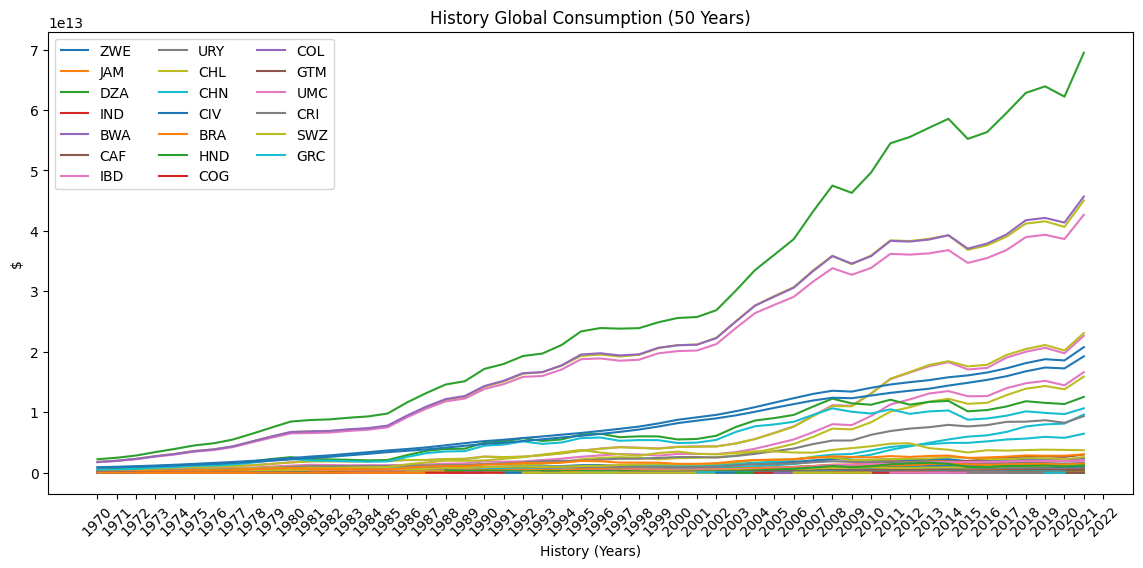

In [10]:
# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize =(14,6))

# Obtener las filas del df
x = df_1.columns[12:] # Omitir las primeras dos columnas (nombre del país y código)

filas = df_1.values.tolist()

# Iterar sobre cada fila (Lista de valores de filas)
for fila in filas:
    # Obtener los datos de la fila para el eje y
    datos_y = fila[12:]  # Omitir las primeras dos columnas (nombre del país y código)
    
    # Trazar la línea utilizando los datos de x e y
    ax.plot(x, datos_y)

# Etiquetas y título
plt.xlabel('History (Years)')
plt.ylabel('$') # Dolares
plt.title('History Global Consumption (50 Years)')
# Legend
plt.legend(df_1.iloc[:20, 1], ncol=3)
# Rotar los ticks del eje x para mejorar la legibilidad
plt.xticks(rotation=45)
# Mostrar la gráfica
plt.show()

In [11]:
# Plotear asia | Note America | UE

# Lista Asia

lista_Asia = ["CHN", "IND", "JPN", "KOR", "RUS", "IDN", "TUR"]

# Lista NA

lista_NA = ['USA', 'CAN', 'MEX']

# Lista g20

list_G20 = ['DEU', 'SAU', 'ARG', 'AUS', 'BRA', 'CAN', 'CHN', 'KOR', 'USA', 'FRA', 'IND', 'IDN', 'ITA', 'JPN', 'MEX', 'GBR', 'RUS']


In [12]:
# Filtrar el DataFrame para Asia
df_Consumption_Asia = df_1[df_1['LOCATION'].isin(lista_Asia)]

# Filtrar el DataFrame para Norteamérica
df_Consumption_NA = df_1[df_1['LOCATION'].isin(lista_NA)]

# Filtrar el DataFrame para la UE
df_Consumption_G20 = df_1[df_1['LOCATION'].isin(list_G20)]


In [13]:
def plot_consumption_by_regions(df_list, region_titles):
    # Configurar la figura y los ejes
    fig, ax = plt.subplots(figsize=(14, 6))

    for i in range(len(df_list)):
        df_region = df_list[i]
        region_title = region_titles[i]

        # Obtener los datos de consumo para la región actual
        datos_y = df_region.iloc[:, 3:].mean().values  # Calcular el promedio de los datos para cada año

        # Trazar la línea utilizando los datos de x e y para la región actual
        x = df_region.columns[3:]  # Omitir las primeras tres columnas (nombre del país, código y tema)
        ax.plot(x, datos_y, label=region_title)

    # Etiquetas y título
    plt.xlabel('Año')
    plt.ylabel('Valor promedio')
    plt.title('Consumo Global por Regiones')

    # Mostrar la leyenda
    plt.legend()
    plt.xticks(rotation=45)

    # Mostrar la gráfica
    plt.show()


- Grafica 6

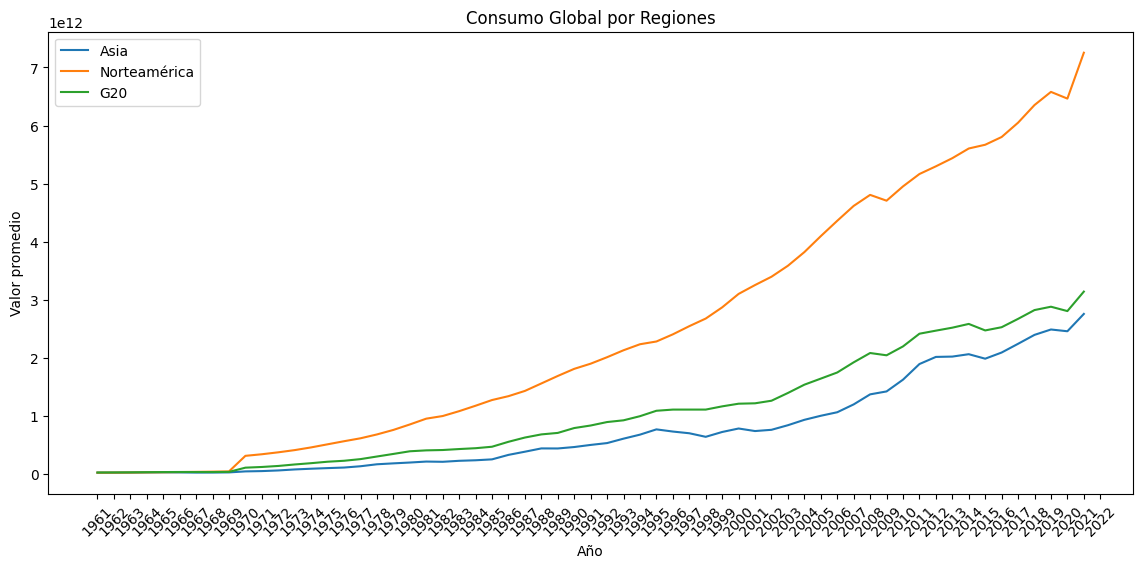

In [14]:
df_list = [df_Consumption_Asia, df_Consumption_NA, df_Consumption_G20 ]
region_titles = ['Asia', 'Norteamérica', 'G20']

plot_consumption_by_regions(df_list, region_titles)


In [15]:

def get_average_consumption(df):
    datos_y = df.iloc[:, 3:].mean().values  # Calcular el promedio de los datos para cada año
    return datos_y




In [16]:
Cons_G20 = get_average_consumption(df_Consumption_G20)


In [17]:
Cons_NA = get_average_consumption(df_Consumption_NA)

In [18]:
Cons_Asia = get_average_consumption(df_Consumption_Asia)




In [19]:
def growth(vector):
    tasas = []
    for i in range(1, len(vector)):
        tasa = ((vector[i] - vector[i-1]) / vector[i-1]) * 100
        tasas.append(tasa)
    return tasas

In [20]:

Asia_Consumo_Growth = growth(Cons_Asia)
na_Consumo_Growth = growth(Cons_NA)
G20_Consumo_Growth = growth(Cons_G20)

In [21]:
arr_col = np.array(df_1.columns[13:])

In [22]:

df_concat_cons  = pd.DataFrame({
    'YEAR': arr_col,
    'Asia_Consumo_Growth': Asia_Consumo_Growth[9:],
    'na_Consumo_Growth': na_Consumo_Growth[9:],
    'G20_Consumo_Growth': G20_Consumo_Growth[9:]
})

In [23]:
df_concat_cons.head()

,YEAR,Asia_Consumo_Growth,na_Consumo_Growth,G20_Consumo_Growth
0,1971,11.677083,8.738525,10.978585
1,1972,22.570380,9.844993,14.645092
2,1973,28.776680,10.207748,18.571104
3,1974,16.034490,11.354652,13.681825
4,1975,11.804289,11.640035,13.515914


- Grafica 9

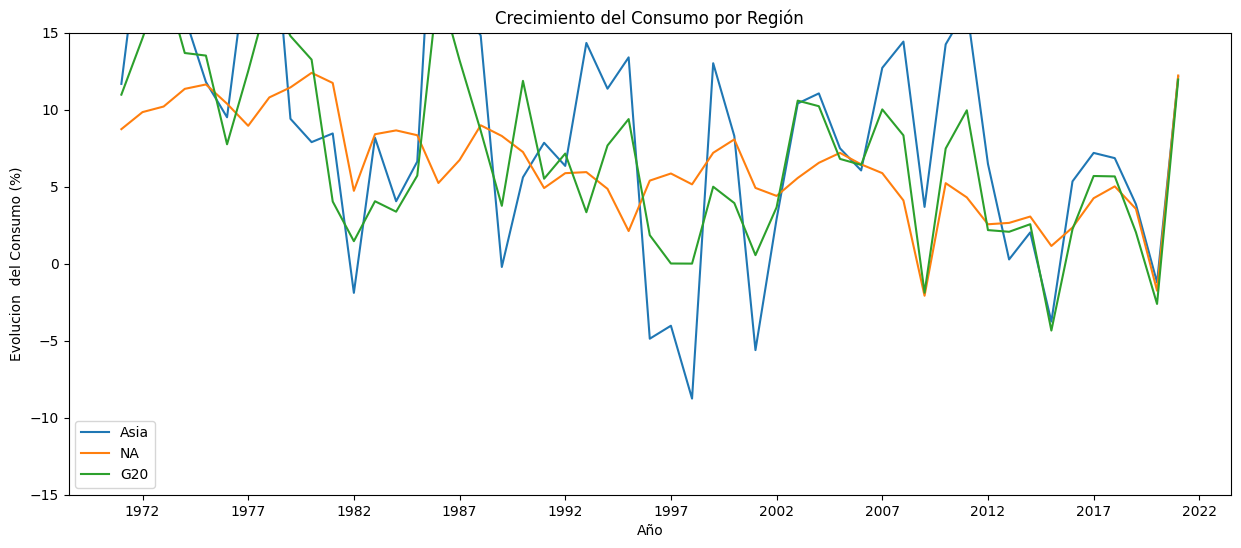

In [24]:
#  las columnas mencionadas y deseas trazar los datos a partir de la fila 9

# Filtrar el DataFrame a partir de la fila 9
df_filtered = df_concat_cons.iloc[0:]

# Obtener los datos de las columnas
x = df_filtered["YEAR"]
asia_growth = df_filtered["Asia_Consumo_Growth"]
na_growth = df_filtered["na_Consumo_Growth"]
g20_growth = df_filtered["G20_Consumo_Growth"]

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(15,6))

# Trazar los datos
ax.plot(x, asia_growth, label="Asia")
ax.plot(x, na_growth, label="NA")
ax.plot(x, g20_growth, label="G20")

# Etiquetas y título
plt.xlabel("Año")
plt.ylabel("Evolucion  del Consumo (%)")
plt.title("Crecimiento del Consumo por Región")

# Mostrar la leyenda
plt.legend()
plt.xticks()

plt.ylim(-15,+15)
# Rotar las etiquetas del eje x
plt.xticks(range(1, len(x), 5))
# Mostrar la gráfica
plt.show()


# GDP

In [31]:

df_GDP1 = pd.read_excel(r'C:\Users\34680\Desktop\Eda-Infration_GDP\src\data\GDP global.xls')

df_GDP1.head()



,Data Source,World Development Indicators,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
0,Last Updated Date,2023-05-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Country Name,Country Code,Indicator Name,Indicator Code,1.960000e+03,1.961000e+03,1.962000e+03,1.963000e+03,1.964000e+03,1.965000e+03,1.966000e+03,1.967000e+03,1.968000e+03,1.969000e+03,1.970000e+03,1.971000e+03,1.972000e+03,1.973000e+03,1.974000e+03,1.975000e+03,1.976000e+03,1.977000e+03,1.978000e+03,1.979000e+03,1.980000e+03,1.981000e+03,1.982000e+03,1.983000e+03,1.984000e+03,1.985000e+03,1.986000e+03,1.987000e+03,1.988000e+03,1.989000e+03,1.990000e+03,1.991000e+03,1.992000e+03,1.993000e+03,1.994000e+03,1.995000e+03,1.996000e+03,1.997000e+03,1.998000e+03,1.999000e+03,2.000000e+03,2.001000e+03,2.002000e+03,2.003000e+03,2.004000e+03,2.005000e+03,2.006000e+03,2.007000e+03,2.008000e+03,2.009000e+03,2.010000e+03,2.011000e+03,2.012000e+03,2.013000e+03,2.014000e+03,2.015000e+03,2.016000e+03,2.017000e+03,2.018000e+03,2.019000e+03,2.020000e+03,2.021000e+03,2022.0
3,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055866e+08,4.877095e+08,5.966480e+08,6.955307e+08,7.648045e+08,8.720670e+08,9.586592e+08,1.083240e+09,1.245810e+09,1.320670e+09,1.379888e+09,1.531844e+09,1.665363e+09,1.722905e+09,1.873184e+09,1.896648e+09,1.962011e+09,2.044134e+09,2.254749e+09,2.359777e+09,2.469832e+09,2.677654e+09,2.843017e+09,2.553631e+09,2.453631e+09,2.637989e+09,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.368970e+09,2.610039e+09,3.126019e+09,NaN
4,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.129152e+10,2.180944e+10,2.370806e+10,2.821128e+10,2.611994e+10,2.968348e+10,3.224054e+10,3.351603e+10,3.652309e+10,4.183018e+10,4.486458e+10,4.948110e+10,5.351720e+10,6.960386e+10,8.606157e+10,9.165319e+10,9.112857e+10,1.034204e+11,1.153501e+11,1.346773e+11,1.706619e+11,1.743947e+11,1.672737e+11,1.749258e+11,1.601410e+11,1.363033e+11,1.525250e+11,1.861529e+11,2.041488e+11,2.175482e+11,2.532352e+11,2.734149e+11,2.382659e+11,2.365373e+11,2.401307e+11,2.696487e+11,2.684255e+11,2.821974e+11,2.658258e+11,2.621838e+11,2.839379e+11,2.588300e+11,2.648815e+11,3.526741e+11,4.388531e+11,5.122337e+11,5.757224e+11,6.608270e+11,7.081192e+11,7.190953e+11,8.603612e+11,9.642130e+11,9.720022e+11,9.826771e+11,1.003403e+12,9.231439e+11,8.898593e+11,1.030482e+12,1.016697e+12,1.009052e+12,9.341791e+11,1.089454e+12,NaN


In [32]:
new_header = df_GDP1.iloc[2]
df_GDP1 = df_GDP1[1:]
df_GDP1 = df_GDP1.set_axis(new_header, axis='columns')

In [33]:
df_GDP1 = df_GDP1.drop([1, 2])

# Restablecer los índices
df_GDP1 = df_GDP1.reset_index(drop=True)

In [34]:
df_GDP1.columns = df_GDP1.columns[:4].tolist() + [str(col).split('.')[0] for col in df_GDP1.columns[4:]]

In [35]:
df_GDP1 = df_GDP1.rename(columns={'Country Code': 'LOCATION'})


In [36]:
df_GDP1['NaN Count'] = df_GDP1.isna().sum(axis=1)

# Ordenar el DataFrame por la columna 'NaN Count' en orden ascendente
df_GDP1_sorted = df_GDP1.sort_values('NaN Count')

In [37]:
mask = df_GDP1['NaN Count'] > 40
mask.value_counts()

False    242
True      24
Name: NaN Count, dtype: int64

In [38]:
df_GDP1=df_GDP1.drop(columns=['Indicator Name', 'Indicator Code' ],axis=1)

In [39]:
df_GDP1.head()

,Country Name,LOCATION,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,NaN Count
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055866e+08,4.877095e+08,5.966480e+08,6.955307e+08,7.648045e+08,8.720670e+08,9.586592e+08,1.083240e+09,1.245810e+09,1.320670e+09,1.379888e+09,1.531844e+09,1.665363e+09,1.722905e+09,1.873184e+09,1.896648e+09,1.962011e+09,2.044134e+09,2.254749e+09,2.359777e+09,2.469832e+09,2.677654e+09,2.843017e+09,2.553631e+09,2.453631e+09,2.637989e+09,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.368970e+09,2.610039e+09,3.126019e+09,NaN,27
1,Africa Eastern and Southern,AFE,2.129152e+10,2.180944e+10,2.370806e+10,2.821128e+10,2.611994e+10,2.968348e+10,3.224054e+10,3.351603e+10,3.652309e+10,4.183018e+10,4.486458e+10,4.948110e+10,5.351720e+10,6.960386e+10,8.606157e+10,9.165319e+10,9.112857e+10,1.034204e+11,1.153501e+11,1.346773e+11,1.706619e+11,1.743947e+11,1.672737e+11,1.749258e+11,1.601410e+11,1.363033e+11,1.525250e+11,1.861529e+11,2.041488e+11,2.175482e+11,2.532352e+11,2.734149e+11,2.382659e+11,2.365373e+11,2.401307e+11,2.696487e+11,2.684255e+11,2.821974e+11,2.658258e+11,2.621838e+11,2.839379e+11,2.588300e+11,2.648815e+11,3.526741e+11,4.388531e+11,5.122337e+11,5.757224e+11,6.608270e+11,7.081192e+11,7.190953e+11,8.603612e+11,9.642130e+11,9.720022e+11,9.826771e+11,1.003403e+12,9.231439e+11,8.898593e+11,1.030482e+12,1.016697e+12,1.009052e+12,9.341791e+11,1.089454e+12,NaN,1
2,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.854235e+09,4.539501e+09,5.220824e+09,6.226199e+09,6.971379e+09,9.715762e+09,1.024977e+10,1.215484e+10,1.563386e+10,1.819041e+10,2.020357e+10,2.056449e+10,2.055058e+10,1.999816e+10,1.801956e+10,1.889635e+10,1.841885e+10,1.890449e+10,2.014344e+10,1.478686e+10,NaN,21
3,Africa Western and Central,AFW,1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,1.583259e+10,1.442604e+10,1.488035e+10,1.688209e+10,2.350461e+10,2.083282e+10,2.526495e+10,3.127382e+10,4.421448e+10,5.144473e+10,6.212939e+10,6.531501e+10,7.119971e+10,8.862840e+10,1.120313e+11,2.110035e+11,1.871637e+11,1.381152e+11,1.142627e+11,1.165073e+11,1.074975e+11,1.103218e+11,1.089435e+11,1.017688e+11,1.218021e+11,1.174571e+11,1.182823e+11,9.882637e+10,8.628174e+10,1.082213e+11,1.257630e+11,1.270639e+11,1.301068e+11,1.375210e+11,1.404103e+11,1.467798e+11,1.766058e+11,2.044709e+11,2.534719e+11,3.100942e+11,3.956559e+11,4.644256e+11,5.664795e+11,5.070295e+11,5.971293e+11,6.804560e+11,7.360399e+11,8.322169e+11,8.924979e+11,7.669580e+11,6.905454e+11,6.837480e+11,7.663597e+11,7.947191e+11,7.847997e+11,8.401873e+11,NaN,1
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.553560e+09,7.072063e+09,8.083872e+09,8.769251e+09,1.020110e+10,1.122876e+10,1.060378e+10,8.307811e+09,5.768720e+09,4.438321e+09,5.538749e+09,7.526447e+09,7.648377e+09,6.506230e+09,6.152923e+09,9.129595e+09,8.936064e+09,1.528559e+10,1.781270e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,8.853861e+10,7.030717e+10,8.169953e+10,1.094366e+11,1.249982e+11,1.334016e+11,1.372444e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.361907e+10,6.740429e+10,NaN,21


In [40]:
df_GDP1=df_GDP1.drop(columns='NaN Count')

In [41]:
print( list_G20,lista_Asia,lista_NA)

['DEU', 'SAU', 'ARG', 'AUS', 'BRA', 'CAN', 'CHN', 'KOR', 'USA', 'FRA', 'IND', 'IDN', 'ITA', 'JPN', 'MEX', 'GBR', 'RUS'] ['CHN', 'IND', 'JPN', 'KOR', 'RUS', 'IDN', 'TUR'] ['USA', 'CAN', 'MEX']


- Grafica 1


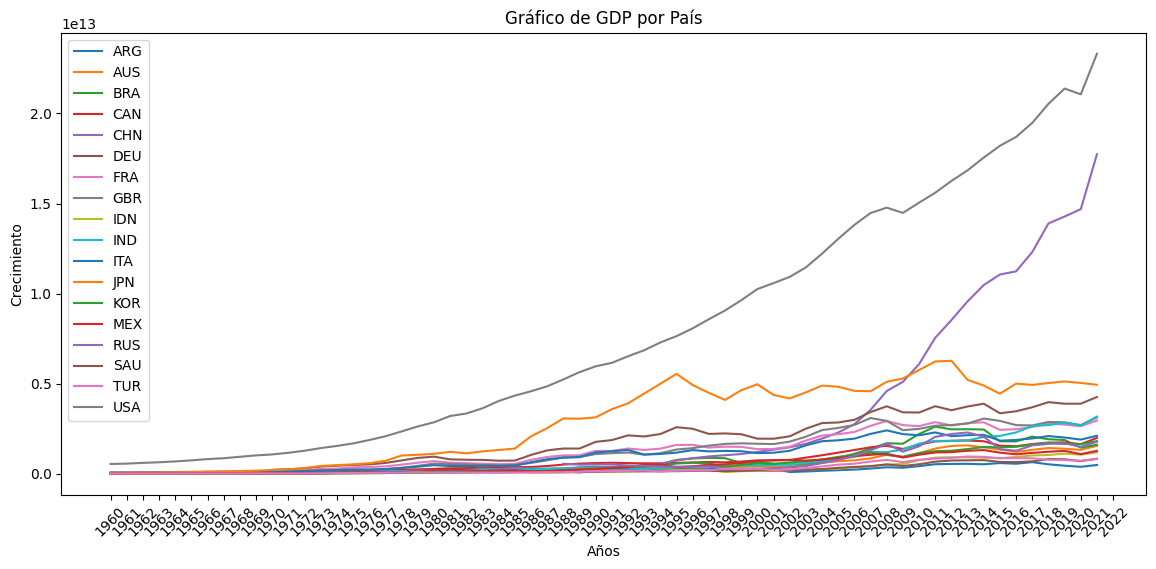

In [42]:

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(14, 6))

# Obtener los años del eje X
years = df_GDP1.columns[2:]

# Lista de grupos de países a incluir en la leyenda
paises_mostrar = [list_G20, lista_Asia, lista_NA]

# Iterar sobre cada fila del DataFrame
for index, row in df_GDP1.iterrows():
    # Obtener el código de país y los datos de la fila para el eje Y
    country = row['LOCATION']
    data = row[2:]

    # Verificar en qué grupo se encuentra el país
    for grupo in paises_mostrar:
        if country in grupo:
            # Trazar la línea utilizando los datos de X e Y
            ax.plot(years, data, label=country)  # Etiqueta con el código de país
            break

# Etiquetas y título
plt.xlabel('Años')
plt.ylabel('Crecimiento')
plt.title('Gráfico de GDP por País')

# Mostrar leyenda solo con los países de las listas
handles, labels = plt.gca().get_legend_handles_labels()
filtered_labels = [label for handle, label in zip(handles, labels) if label in list_G20 or label in lista_Asia or label in lista_NA]
plt.legend(handles, filtered_labels)

# Rotar los ticks del eje X para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()


In [43]:
# Declaro funcion para ploteo de regiones.
def plot_GPD_by_regions(df_list, region_titles):
    # Configurar la figura y los ejes
    fig, ax = plt.subplots(figsize=(14, 6))

    for i in range(len(df_list)):
        df_region = df_list[i]
        region_title = region_titles[i]

        # Obtener los datos de consumo para la región actual
        datos_y = df_region.iloc[:, 3:].mean().values  # Calcular el promedio de los datos para cada año

        # Trazar la línea utilizando los datos de x e y para la región actual
        x = df_region.columns[3:]  # Omitir las primeras tres columnas (nombre del país, código y tema)
        ax.plot(x, datos_y, label=region_title)

    # Etiquetas y título
    plt.xlabel('Años')
    plt.ylabel('GDP (Us$)')
    plt.title(region_titles)

    # Mostrar la leyenda
    plt.legend()
    plt.xticks(rotation=45)

    # Mostrar la gráfica
    plt.show()



In [44]:
# Filtrar el DataFrame para Asia
df_GDP_Asia = df_GDP1[df_GDP1['LOCATION'].isin(lista_Asia)]

# Filtrar el DataFrame para Norteamérica
df_GDP_NA = df_GDP1[df_GDP1['LOCATION'].isin(lista_NA)]

# Filtrar el DataFrame para la UE
df_GDP_G20 = df_GDP1[df_GDP1['LOCATION'].isin(list_G20)]


In [45]:
df_list_GDP = [df_GDP_Asia, df_GDP_NA, df_GDP_G20 ]
region_titles = ['Asia', 'Norteamérica', 'G20']

- Grafica 4


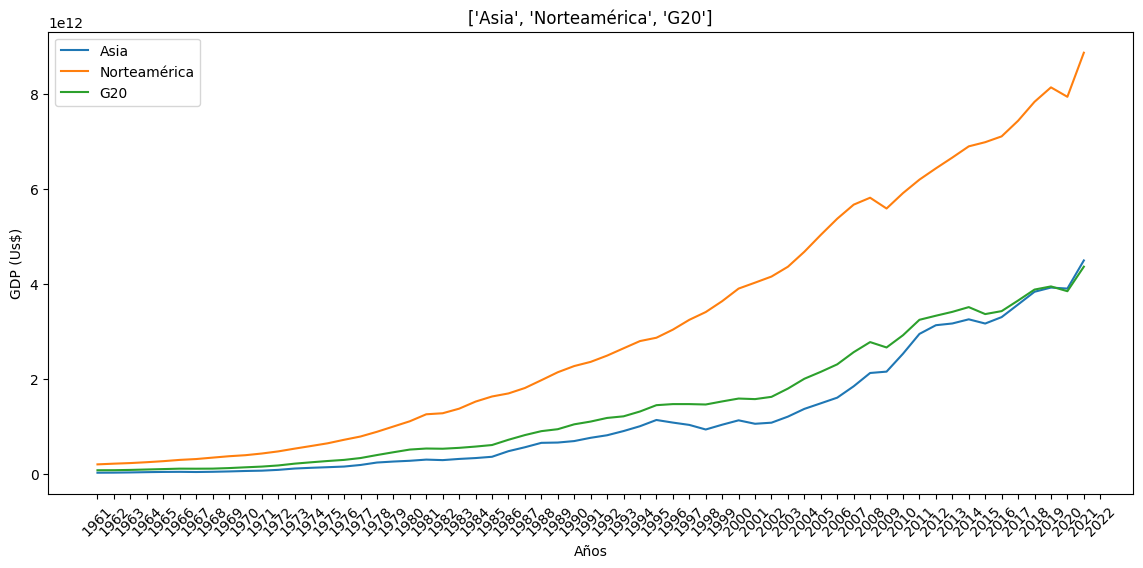

In [46]:
plot_GPD_by_regions(df_list_GDP, region_titles)


In [47]:
# Uso de la funcion | hacer mas general

# plot_GPD_by_regions(df_list_GDP, region_titles)

In [48]:
df_GDP1.head()

,Country Name,LOCATION,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.055866e+08,4.877095e+08,5.966480e+08,6.955307e+08,7.648045e+08,8.720670e+08,9.586592e+08,1.083240e+09,1.245810e+09,1.320670e+09,1.379888e+09,1.531844e+09,1.665363e+09,1.722905e+09,1.873184e+09,1.896648e+09,1.962011e+09,2.044134e+09,2.254749e+09,2.359777e+09,2.469832e+09,2.677654e+09,2.843017e+09,2.553631e+09,2.453631e+09,2.637989e+09,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.368970e+09,2.610039e+09,3.126019e+09,NaN
1,Africa Eastern and Southern,AFE,2.129152e+10,2.180944e+10,2.370806e+10,2.821128e+10,2.611994e+10,2.968348e+10,3.224054e+10,3.351603e+10,3.652309e+10,4.183018e+10,4.486458e+10,4.948110e+10,5.351720e+10,6.960386e+10,8.606157e+10,9.165319e+10,9.112857e+10,1.034204e+11,1.153501e+11,1.346773e+11,1.706619e+11,1.743947e+11,1.672737e+11,1.749258e+11,1.601410e+11,1.363033e+11,1.525250e+11,1.861529e+11,2.041488e+11,2.175482e+11,2.532352e+11,2.734149e+11,2.382659e+11,2.365373e+11,2.401307e+11,2.696487e+11,2.684255e+11,2.821974e+11,2.658258e+11,2.621838e+11,2.839379e+11,2.588300e+11,2.648815e+11,3.526741e+11,4.388531e+11,5.122337e+11,5.757224e+11,6.608270e+11,7.081192e+11,7.190953e+11,8.603612e+11,9.642130e+11,9.720022e+11,9.826771e+11,1.003403e+12,9.231439e+11,8.898593e+11,1.030482e+12,1.016697e+12,1.009052e+12,9.341791e+11,1.089454e+12,NaN
2,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,1.408889e+09,1.748887e+09,1.831109e+09,1.595555e+09,1.733333e+09,2.155555e+09,2.366667e+09,2.555556e+09,2.953333e+09,3.300000e+09,3.697940e+09,3.641723e+09,3.478788e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.854235e+09,4.539501e+09,5.220824e+09,6.226199e+09,6.971379e+09,9.715762e+09,1.024977e+10,1.215484e+10,1.563386e+10,1.819041e+10,2.020357e+10,2.056449e+10,2.055058e+10,1.999816e+10,1.801956e+10,1.889635e+10,1.841885e+10,1.890449e+10,2.014344e+10,1.478686e+10,NaN
3,Africa Western and Central,AFW,1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,1.583259e+10,1.442604e+10,1.488035e+10,1.688209e+10,2.350461e+10,2.083282e+10,2.526495e+10,3.127382e+10,4.421448e+10,5.144473e+10,6.212939e+10,6.531501e+10,7.119971e+10,8.862840e+10,1.120313e+11,2.110035e+11,1.871637e+11,1.381152e+11,1.142627e+11,1.165073e+11,1.074975e+11,1.103218e+11,1.089435e+11,1.017688e+11,1.218021e+11,1.174571e+11,1.182823e+11,9.882637e+10,8.628174e+10,1.082213e+11,1.257630e+11,1.270639e+11,1.301068e+11,1.375210e+11,1.404103e+11,1.467798e+11,1.766058e+11,2.044709e+11,2.534719e+11,3.100942e+11,3.956559e+11,4.644256e+11,5.664795e+11,5.070295e+11,5.971293e+11,6.804560e+11,7.360399e+11,8.322169e+11,8.924979e+11,7.669580e+11,6.905454e+11,6.837480e+11,7.663597e+11,7.947191e+11,7.847997e+11,8.401873e+11,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.930503e+09,5.550483e+09,5.550483e+09,5.784342e+09,6.131475e+09,7.553560e+09,7.072063e+09,8.083872e+09,8.769251e+09,1.020110e+10,1.122876e+10,1.060378e+10,8.307811e+09,5.768720e+09,4.438321e+09,5.538749e+09,7.526447e+09,7.648377e+09,6.506230e+09,6.152923e+09,9.129595e+09,8.936064e+09,1.528559e+10,1.781270e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,8.853861e+10,7.030717e+10,8.169953e+10,1.094366e+11,1.249982e+11,1.334016e+11,1.372444e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.361907e+10,6.740429e+10,NaN


In [49]:
def get_average_GDP(df):
    datos_y = df.iloc[:, 4:].mean().values  # Calcular el promedio de los datos para cada año
    return datos_y

In [50]:
df_list_GDP = [df_GDP_Asia, df_GDP_NA, df_GDP_G20 ]
region_titles = ['Asia', 'Norteamérica', 'G20']

In [51]:
gdp_Asia = get_average_GDP(df_GDP_Asia)
gdp_NA = get_average_GDP(df_GDP_NA)
gdp_G20 = get_average_GDP(df_GDP_G20)

In [52]:
def growth(vector):
    tasas = []
    for i in range(1, len(vector)):
        tasa = ((vector[i] - vector[i-1]) / vector[i-1]) * 100
        tasas.append(tasa)
    return tasas

In [53]:
df_Asia_std = pd.DataFrame(gdp_Asia, columns=['Asia_GDP_Growth'])
df_NA_std = pd.DataFrame(gdp_NA,columns=['gdp_NA_growth'])
df_G20_std = pd.DataFrame(gdp_G20, columns=['gdp_G20_growth'])

In [54]:
df_gdp_concat = pd.concat([df_Asia_std, df_NA_std, df_G20_std], axis=1)

In [55]:
years = list(range(1962, 2023))

df_gdp_concat.insert(0, 'YEAR', years)
# df_gdp_concat

- Grafica 7

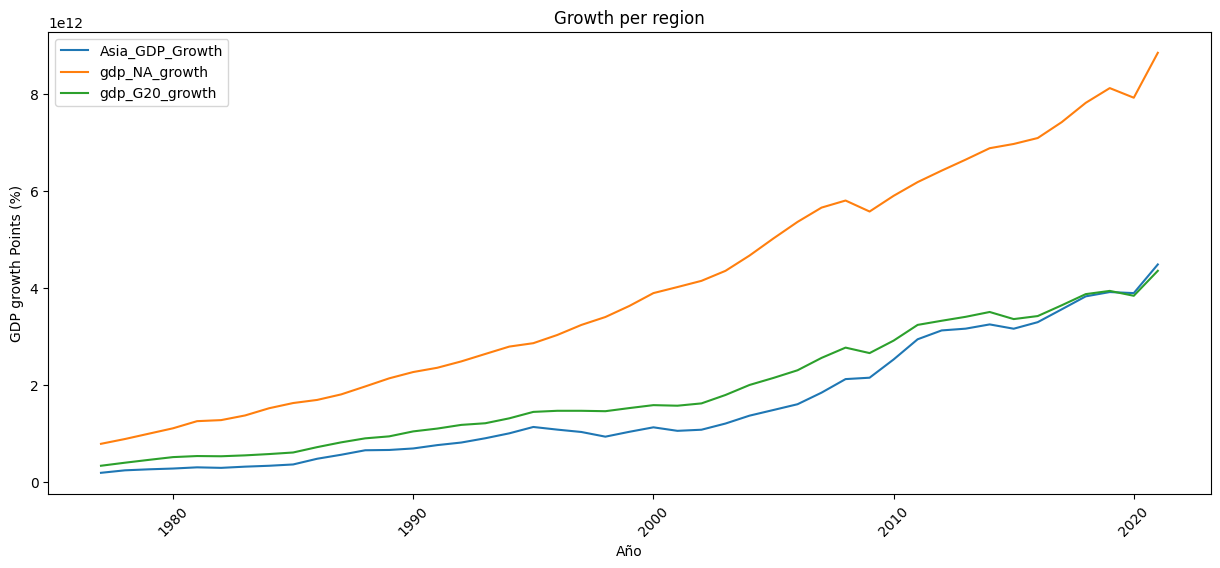

In [56]:

df_plot = df_gdp_concat.iloc[15:-1]  # Obtener el subconjunto del DataFrame desde la fila 15 hasta la penúltima

# Configurar la figura y los ejes
fig, ax = plt.subplots(figsize=(15, 6))

# Trazar las columnas 'Asia_GDP_Growth', 'na_GDP_Growth' y 'g20_GDP_Growth'
ax.plot(df_plot['YEAR'], df_plot['Asia_GDP_Growth'], label='Asia_GDP_Growth')
ax.plot(df_plot['YEAR'], df_plot['gdp_NA_growth'], label='gdp_NA_growth')
ax.plot(df_plot['YEAR'], df_plot['gdp_G20_growth'], label='gdp_G20_growth')

# Etiquetas y título
plt.xlabel('Año')
plt.ylabel('GDP growth Points (%)')
plt.title('Growth per region')

# Mostrar la leyenda
plt.legend()
plt.xticks( rotation=45)
# Mostrar la gráfica
plt.show()

## Inflation

In [60]:


df_inflation = pd.read_csv(r'C:\Users\34680\Desktop\Eda-Infration_GDP\src\data\Inflation.csv')


In [61]:
df_inflation =df_inflation.drop(columns=['Indicator Name','Indicator Code'], axis=1)
# df_Inflation

In [62]:
df_inflation.head()

,Country Name,LOCATION,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.032258,1.073966,3.643045,3.121868,3.991628,5.836688,5.555556,3.873375,5.215560,6.311080,3.361391,3.225288,2.999948,1.869489,2.280372,4.044021,2.883604,3.315247,3.656365,2.529129,3.397787,3.608024,5.392568,8.955987,-2.135429,2.078141,4.316297,0.627472,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.598394,15.224099,11.216471,14.238055,12.526893,15.06985,15.066512,14.461591,12.139918,11.567524,10.983863,13.006566,13.891972,12.563443,12.522254,12.558202,12.457914,17.678100,16.167612,13.135661,14.852815,12.288591,9.706586,10.249599,7.495256,7.819865,8.601485,5.840354,8.763754,7.449700,5.023421,8.558038,8.898164,8.450775,12.566645,8.954218,5.537538,8.971206,9.158707,5.750981,5.370290,5.250171,6.571396,6.399343,4.720811,4.120246,6.362961,6.079328,NaN,NaN
2,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.686269,6.784597,8.680571,26.418664,-6.811161,2.178538,11.804186,6.441213,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.799211,12.059765,10.671937,11.250000,7.354926,5.950965,0.248789,2.523659,0.869287,1.057361,1.741888,-0.062999,0.553456,31.841017,10.563289,4.914240,3.997142,4.471125,0.372266,2.530775,4.361529,3.188693,1.760904,0.694336,5.631634,4.415900,3.607368,8.452976,3.282440,1.784844,4.018699,4.578375,2.439201,1.768436,2.130268,1.487416,1.764635,1.784050,1.758565,2.437609,3.745700,9.393839,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.783784,299.509804,1378.527607,949.792531,2666.450593,4145.105982,219.176721,107.284822,248.195902,324.996872,152.561022,108.897436,98.224144,43.542107,22.953514,13.305210,12.251497,12.475829,13.730284,14.469656,13.482468,10.277905,8.777814,7.280387,9.353840,30.698958,29.842578,19.630594,17.079704,22.271564,25.754266,NaN,NaN


In [63]:

# Eliminar la columna "Unnamed: 67" si no contiene información relevante
df_inflation = df_inflation.drop(columns=['Unnamed: 67'])

- Grafica 2

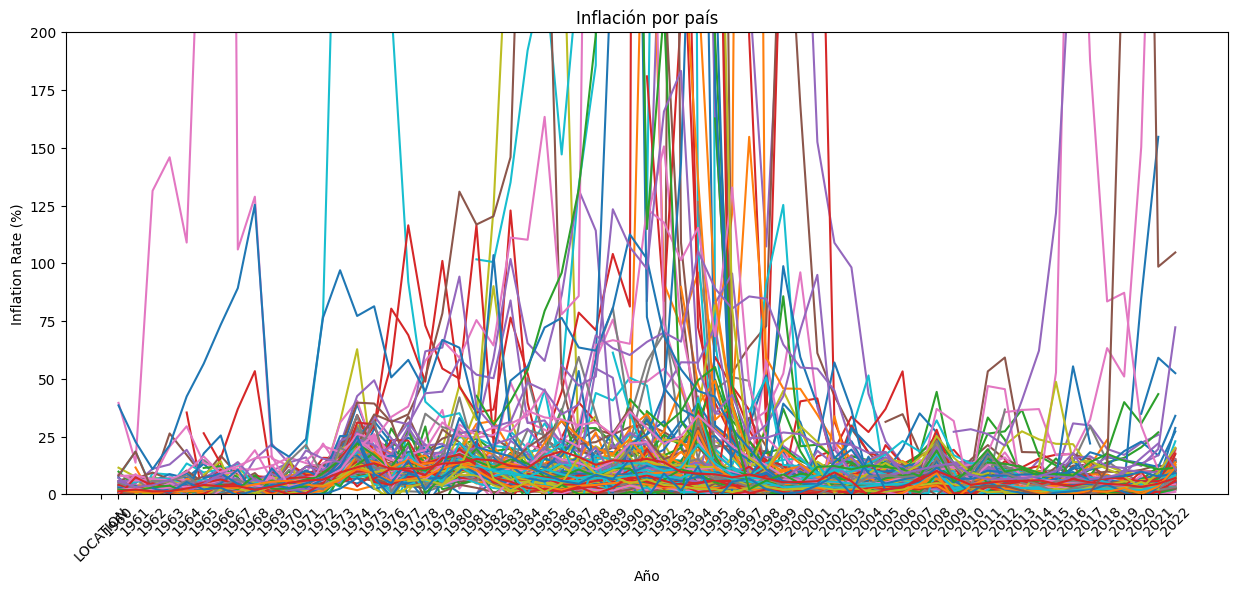

In [64]:



# Transponer el DataFrame para tener los años como columnas
df_inflation_t = df_inflation.transpose()

# Establecer el primer renglón como nombres de columnas
df_inflation_t.columns = df_inflation_t.iloc[0]
df_inflation_t = df_inflation_t[1:]

# Convertir los valores a tipo numérico
df_inflation_t = df_inflation_t.apply(pd.to_numeric, errors='coerce')

# Graficar los datos
plt.figure(figsize=(15, 6))
for country in df_inflation_t.columns:
    plt.plot(df_inflation_t.index, df_inflation_t[country], label=country)

plt.title("Inflación por país")
plt.xlabel("Año")
plt.ylabel("Inflation Rate (%)")
# plt.legend(loc="upper left")
# plt.grid(True)
plt.xticks(rotation=45)
plt.ylim(0, 200)
plt.show()


In [65]:
# Lista Asia

lista_Asia = ["CHN", "IND", "JPN", "KOR", "RUS", "IDN", "TUR"]

# Lista NA

lista_NA = ['USA', 'USA', 'MEX']

# Lista g20

list_g20 = ['DEU', 'SAU', 'ARG', 'AUS', 'BRA', 'CAN', 'CHN', 'KOR', 'USA', 'FRA', 'IND', 'IDN', 'ITA', 'JPN', 'MEX', 'GBR', 'RUS']


In [66]:
# Filtrar el DataFrame para Asia
df_I_Asia = df_inflation[df_inflation['LOCATION'].isin(lista_Asia)]

# Filtrar el DataFrame para Norteamérica
df_I_NA = df_inflation[df_inflation['LOCATION'].isin(lista_NA)]

# Filtrar el DataFrame para la UE
df_I_G20 = df_inflation[df_inflation['LOCATION'].isin(list_G20)]


In [67]:
df_list_I = [df_I_Asia, df_I_NA, df_I_G20 ]
region_titles = ['Asia', 'Norteamérica', 'G20']

In [68]:

def plot_I_by_regions(df_list, region_titles):
    # Configurar la figura y los ejes
    fig, ax = plt.subplots(figsize=(14, 6))

    for i in range(len(df_list)):
        df_region = df_list[i]
        region_title = region_titles[i]

        # Obtener los datos de consumo para la región actual
        datos_y = df_region.iloc[:, 3:].mean().values  # Calcular el promedio de los datos para cada año

        # Trazar la línea utilizando los datos de x e y para la región actual
        x = df_region.columns[3:]  # Omitir las primeras tres columnas (nombre del país, código y tema)
        ax.plot(x, datos_y, label=region_title)

    # Etiquetas y título
    plt.xlabel('Años')
    plt.ylabel('Inflation Rate (%)')
    plt.title(region_titles)

    # Mostrar la leyenda
    plt.legend()
    plt.xticks(rotation=45)

    # Mostrar la gráfica
    plt.show()

- Grafica 5

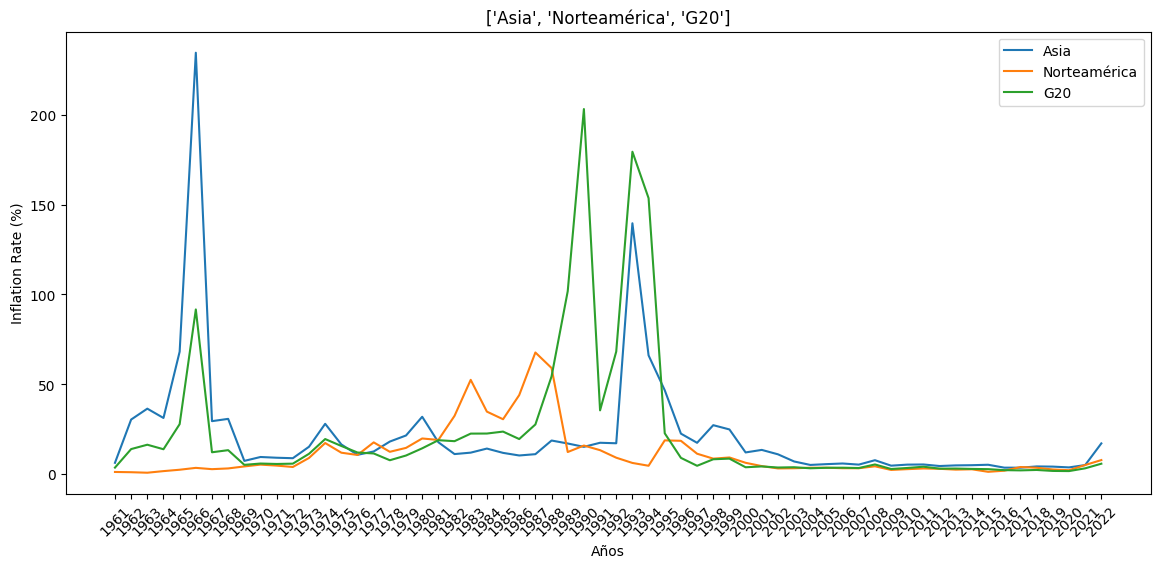

In [69]:
plot_I_by_regions(df_list_I, region_titles)


- Grafica 8

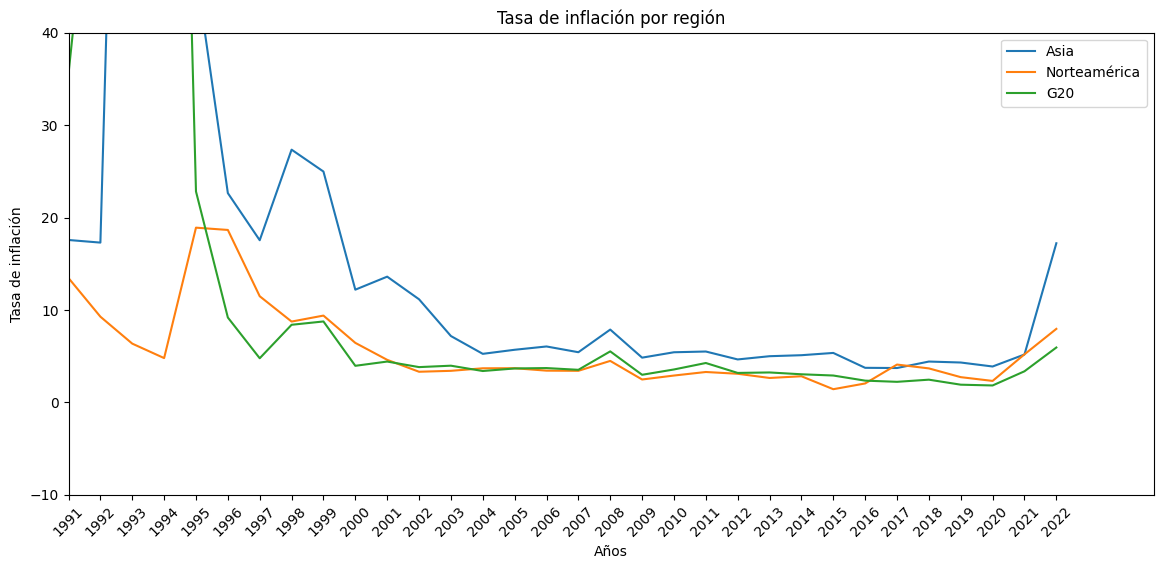

In [70]:

fig, ax = plt.subplots(figsize=(14, 6))

for i in range(len(df_list_I)):
    df_region = df_list_I[i]
    region_title = region_titles[i]

    # Obtener los datos de inflación para la región actual
    datos_y = df_region.iloc[:, 3:].mean().values  # Calcular el promedio de los datos para cada año

    # Trazar la línea utilizando los datos de x e y para la región actual
    x = df_region.columns[3:]  # Omitir las primeras tres columnas (nombre del país, código y tema)
    ax.plot(x, datos_y, label=region_title)

# Etiquetas y título
plt.xlabel('Años')
plt.ylabel('Tasa de inflación')
plt.title('Tasa de inflación por región')

# Mostrar la leyenda
plt.legend()
plt.ylim(-10, 40)
plt.xlim(30, None)

plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()


In [71]:
# inflation_Q = pd.read_csv('Inflaccion quartiles.csv')
# inflation_Q.head()



In [72]:
# Regrex para visual años
# inflation_Q['TIME'] = inflation_Q['TIME'].str.replace('-Q\d+', '', regex=True)


In [73]:
# plotearINFLACION_Q


# # plotear EA17 
# ea17_inflation = inflation_Q.loc[inflation_Q['LOCATION'] == 'EA17']
# ea17_inflation_grouped = ea17_inflation.groupby('TIME')['Value'].mean().reset_index()
# # plotear OECD
# oecd_inflation = inflation_Q.loc[inflation_Q['LOCATION'] == 'OECD']
# oecd_inflation_grouped = oecd_inflation.groupby('TIME')['Value'].mean().reset_index()


# plt.figure(figsize=(16, 4))
# # Añadir ambos ocd y world
# plt.plot(ea17_inflation_grouped['TIME'], ea17_inflation_grouped['Value'],color='b',label='EA17') #blue
# plt.plot(oecd_inflation_grouped['TIME'], oecd_inflation_grouped['Value'],color='g',label='OECD') #green


# # Titulo leyenda y ejes
# plt.title('Inflation Comparison | Eu-17 | OECD')
# plt.xlabel('Año')
# plt.ylabel('Porcentage(Pts)')
# plt.legend()


# plt.xticks(inflation_Q['TIME'],rotation=45)
# plt.show()